# Roland's Working Notebook

## Description

Here's where I'd outline the goals of this specific notebook, and how they fit into the larger project goals

In [71]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
import datetime

conn = sqlite3.connect('..\..\data\im.db')


## Correlating Genre with Net Profit
### Step 1 - Gathering the Data
The two columns of interest to correlate are Genres, and World Wide Gross Profit. The Genres information can be found in the `im.db` database, in the `movie_basics` table, under the column named `genres`. The World Wide Gross Profit can be found in the `tn.movie_budgets.csv` file under the column `worldwide_gross`.

In [19]:
imdb = pd.read_sql("""
SELECT mb.genres, mb.primary_title
FROM movie_basics mb
""", conn)
imdb

,genres,primary_title
0,"Action,Crime,Drama",Sunghursh
1,"Biography,Drama",One Day Before the Rainy Season
2,Drama,The Other Side of the Wind
3,"Comedy,Drama",Sabse Bada Sukh
4,"Comedy,Drama,Fantasy",The Wandering Soap Opera
...,...,...
146139,Drama,Kuambil Lagi Hatiku
146140,Documentary,Rodolpho Teóphilo - O Legado de um Pioneiro
146141,Comedy,Dankyavar Danka
146142,None,6 Gunn


In [14]:
tn = pd.read_csv('../../data/tn.movie_budgets.csv')
tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


### Step 2 - Merging the Two Data Frames
Data from the im.db file and the tn.movie_budgets file are both stored in separate pandas dataframes. In order to correlate that data with the power of the pandas library, all data needs to be stored in a single data frame. I will make use of the `pd.merge()` function in order to merge two data frames with an inner join on a specific column.

In [69]:
merged = pd.merge(imdb, tn, how='inner', left_on='primary_title', right_on='movie')
merged.drop(columns=['id', 'release_date', 'domestic_gross', 'movie'], inplace=True)
merged = merged[['primary_title', 'genres', 'production_budget', 'worldwide_gross']]
merged

,primary_title,genres,production_budget,worldwide_gross
0,Foodfight!,"Action,Animation,Comedy","$45,000,000","$73,706"
1,Mortal Kombat,"Action,Adventure,Fantasy","$20,000,000","$122,133,227"
2,The Overnight,None,"$200,000","$1,165,996"
3,The Overnight,"Comedy,Mystery","$200,000","$1,165,996"
4,On the Road,"Adventure,Drama,Romance","$25,000,000","$9,313,302"
...,...,...,...,...
3810,Fuel,"Documentary,Sport","$2,500,000","$174,255"
3811,Diner,Crime,"$5,000,000","$12,592,907"
3812,Traitor,"Action,Drama,Romance","$22,000,000","$27,882,226"
3813,Ray,Crime,"$40,000,000","$124,823,094"


### Step 3 - Cleaning up the Data
The data frame is currently in the format that it needs to be in, but in order to perform aggregations or plot the data in any meaningful way, we need to convert the data type of all numerical columns from strings into integers or floats (depending on the data).

To further make the data more meaningful we must create a column called `net_profit` that describes the profit made as `worldwide_gross - production_budget`

In [70]:
cleaned = merged
cleaned.production_budget = cleaned.production_budget.str.replace('$', '').str.replace(',','')
cleaned.worldwide_gross = cleaned.worldwide_gross.str.replace('$', '').str.replace(',','')
cleaned

,primary_title,genres,production_budget,worldwide_gross
0,Foodfight!,"Action,Animation,Comedy",45000000,73706
1,Mortal Kombat,"Action,Adventure,Fantasy",20000000,122133227
2,The Overnight,None,200000,1165996
3,The Overnight,"Comedy,Mystery",200000,1165996
4,On the Road,"Adventure,Drama,Romance",25000000,9313302
...,...,...,...,...
3810,Fuel,"Documentary,Sport",2500000,174255
3811,Diner,Crime,5000000,12592907
3812,Traitor,"Action,Drama,Romance",22000000,27882226
3813,Ray,Crime,40000000,124823094


In [55]:
cleaned.production_budget = cleaned.production_budget.astype(int)
cleaned.worldwide_gross = cleaned.worldwide_gross.astype(np.int64)
cleaned['net_profit'] = cleaned.worldwide_gross - cleaned.production_budget
cleaned

,primary_title,genres,production_budget,worldwide_gross,net_profit
0,Foodfight!,"Action,Animation,Comedy",45000000,73706,-44926294
1,Mortal Kombat,"Action,Adventure,Fantasy",20000000,122133227,102133227
2,The Overnight,None,200000,1165996,965996
3,The Overnight,"Comedy,Mystery",200000,1165996,965996
4,On the Road,"Adventure,Drama,Romance",25000000,9313302,-15686698
...,...,...,...,...,...
3810,Fuel,"Documentary,Sport",2500000,174255,-2325745
3811,Diner,Crime,5000000,12592907,7592907
3812,Traitor,"Action,Drama,Romance",22000000,27882226,5882226
3813,Ray,Crime,40000000,124823094,84823094


### Step 4 - Drawing Conclusions
In order to draw concolusions, we must use an aggregate function after grouping the data by each distinct genre string.

In [65]:
grouped = cleaned.groupby('genres').agg({'net_profit':['mean']})
grouped.reset_index(inplace=True)
grouped.sort_values(by=('net_profit', 'mean'), ascending=False, inplace=True)
grouped


,genres,net_profit
,,mean
317,"Fantasy,Romance",1.122470e+09
111,"Adventure,Drama,Sport",1.122470e+09
308,"Family,Fantasy,Musical",8.438154e+08
117,"Adventure,Fantasy",4.695440e+08
14,"Action,Adventure,Sci-Fi",4.385199e+08
...,...,...
275,"Drama,History,Sport",-2.983117e+07
60,"Action,Fantasy,Western",-3.348568e+07
271,"Drama,Fantasy,Thriller",-3.992088e+07


### Step 5 - Creating Figures and Graphs
Finally we must create graphs that can show our business partners which genres would be good to focus on. The average net_profit for these 10 genres in our graph are the highest of any genres in the database

<AxesSubplot:xlabel='genres'>

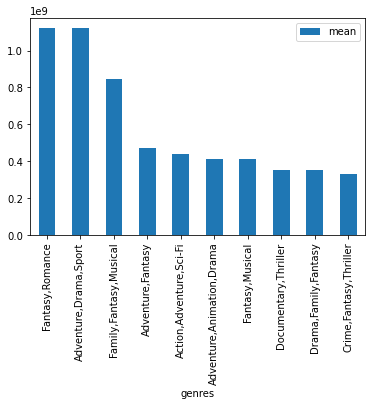

In [66]:
grouped.head(10).plot.bar(x='genres',y='net_profit')

## Correlating Season with Net Profit
### Step 1
As from before, our first step is always to take the data from whichever database it is housed in and make sure that we get all the columns we need

In [89]:
tn = pd.read_csv('../../data/tn.movie_budgets.csv')
tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


### Step 2 - Cleaning up the data
For comparing Season with Net Profit, both items are in the same file so it becomes much easier to load and manipulate the data. For this comparison we want to see if the season has an impact on the net profit that a movie makes. In order to accomplish this we must map the release date to one of the four seasons and then move on to aggregation.

In [87]:
def date_to_season(d):
    # date = datetime.datetime.strptime(d, '%b %d, %Y')
    # if date.month in [12,1,2]:
    #     return 'Winter'
    # elif date.month in [3,4,5]:
    #     return 'Spring'
    # elif date.month in [6,7,8]:
    #     return 'Summer'
    # else:
    #     return 'Fall'
    return d[:3]

In [90]:
tn['season'] = tn.release_date.map(lambda x: date_to_season(x))
tn.worldwide_gross = tn.worldwide_gross.str.replace('$', '').str.replace(',','')
tn.production_budget = tn.production_budget.str.replace('$', '').str.replace(',','')
tn.worldwide_gross = tn.worldwide_gross.astype(np.int64)
tn.production_budget = tn.production_budget.astype(np.int64)
tn['net_profit'] = tn.worldwide_gross - tn.production_budget
tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,season,net_profit
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279,Dec,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,May,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350,Jun,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,May,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,Dec,999721747
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,$0,0,Dec,-7000
5778,79,"Apr 2, 1999",Following,6000,"$48,482",240495,Apr,234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,"$1,338",1338,Jul,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,$0,0,Sep,-1400


<AxesSubplot:xlabel='season'>

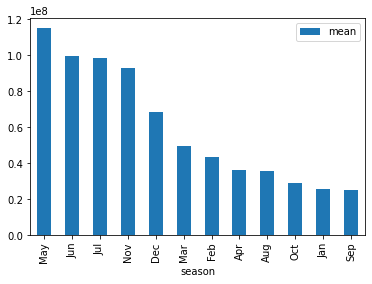

In [91]:
group_by_season = tn.groupby('season').agg({'net_profit': ['mean']})
group_by_season.sort_values(by=('net_profit', 'mean'), inplace=True, ascending=False)
group_by_season.reset_index(inplace=True)
group_by_season.plot.bar(x='season', y='net_profit')